In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
modeling_data = pd.read_csv('modeling_data.csv')

modeling_data

,date,username,tweet_raw,Custom sentiment,sentiment_category,happy,angry,surprise,sad,fear,afinn,bing,sid,bertweet,bertweet_confidence,open price,24 Change,Interday Volatility
0,2024-02-09,ShardiB2,$SOLProbably see a trend shift to green here soon,0.0000,Neutral,0.00,0.00,0.00,0.00,1.00,0.0,0.0,0.0000,0.0,0.908659,46730.526874,4.183230,5.090641
1,2024-02-09,vinsolana,Mmm good job @samoyedcoin i like what you’re d...,0.6597,Positive,0.00,0.00,0.00,0.00,1.00,5.0,2.0,0.6597,1.0,0.986673,46730.526874,4.183230,5.090641
2,2024-02-09,claytopians_NFT,Providing value is key & being clear about the...,0.8920,Positive,0.00,0.05,0.15,0.30,0.50,4.0,1.0,0.8771,0.0,0.905987,46730.526874,4.183230,5.090641
3,2024-02-09,Solmaxxi,$SOL is pushing for $110.Remember anon this ma...,-0.7105,Negative,0.38,0.12,0.38,0.00,0.12,0.0,1.0,-0.7105,0.0,0.627812,46730.526874,4.183230,5.090641
4,2024-02-09,sharkdad81,$PDEX project is stronger than $UNI $CAKE and ...,0.3818,Positive,0.00,0.00,0.00,1.00,0.00,2.0,2.0,0.3818,1.0,0.988513,46730.526874,4.183230,5.090641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57006,2023-12-08,BrantfordTrue,@Wealthsimple do you guys have any comments to...,0.8196,Positive,0.14,0.00,0.14,0.14,0.57,4.0,2.0,0.7906,0.0,0.716348,43637.834210,0.156281,2.806852
57007,2023-12-17,makoto_ch_,#Bitcoin recovery incoming...Are you ready?,0.3612,Positive,1.00,0.00,0.00,0.00,0.00,0.0,2.0,0.3612,1.0,0.544448,41925.141137,-0.793948,1.509502
57008,2023-12-17,Minhcrypto203,Avowed has hand casted spells as well as wands...,-0.2003,Negative,0.00,0.00,0.80,0.00,0.20,-1.0,2.0,-0.1280,0.0,0.828905,41925.141137,-0.793948,1.509502
57009,2023-12-17,tommyinnit,She needs to declare for the @NBA draft then c...,0.0000,Neutral,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0000,0.0,0.955351,41925.141137,-0.793948,1.509502


Unique values in y_test: {'Neutral', 'Positive', 'Negative'}
Unique values in y_pred: {'Neutral', 'Positive'}


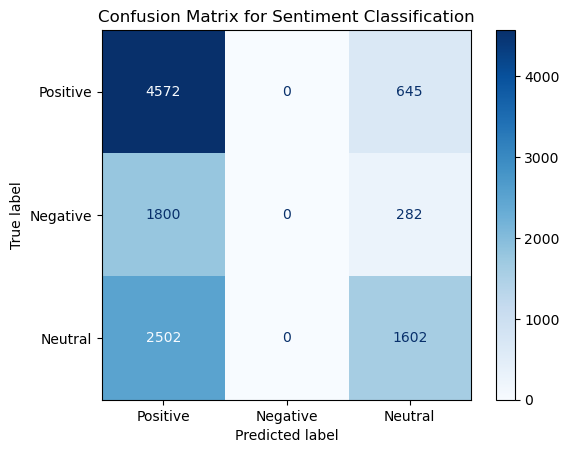

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




def categorize_afinn(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'


modeling_data['sentiment_category'] = modeling_data['afinn'].apply(categorize_afinn)


X = modeling_data[['happy', 'angry', 'surprise', 'sad', 'fear']]
y = modeling_data['sentiment_category'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)


print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))


cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative', 'Neutral'])


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative', 'Neutral'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Sentiment Classification")
plt.show()

Mean Absolute Error (MAE): 2.3983
Mean Squared Error (MSE): 17.6581
R-squared (R²): 0.0373


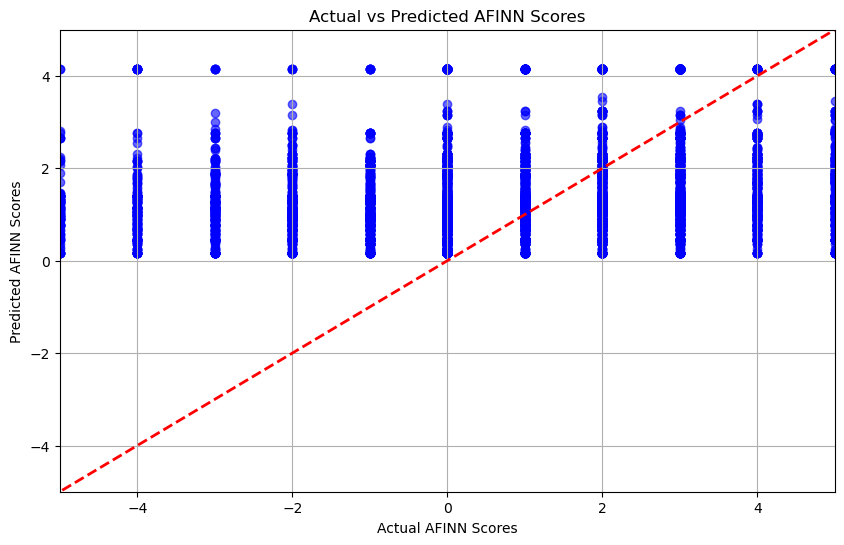

In [26]:

# Step 1: Prepare your data
X = modeling_data[['happy', 'angry', 'surprise', 'sad', 'fear']]
y = modeling_data['afinn']  # Target variable (sentiment scores)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Perfect prediction line

# Set axis limits
plt.xlim(-5, 5)  # Adjust based on the AFINN score range
plt.ylim(-5, 5)  # Adjust based on the AFINN score range

# Add labels and title
plt.xlabel('Actual AFINN Scores')
plt.ylabel('Predicted AFINN Scores')
plt.title('Actual vs Predicted AFINN Scores')
plt.grid()
plt.show()

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ValueError: could not convert string to float: 'Positive'

In [17]:
print(mae)
print(mse)
print(r2)

2.398335068921491
17.658111930395506
0.037346282396071184
